In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
from scipy.spatial import distance_matrix
from sklearn.metrics import cohen_kappa_score
from scipy import stats
from matplotlib.font_manager import FontProperties
from matplotlib import rcParams

In [2]:
GROUP = 6
MAX_PART = 14

## Evaluation Punch Card

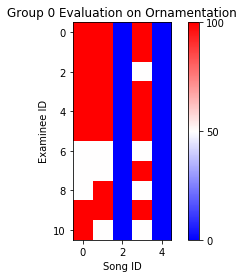

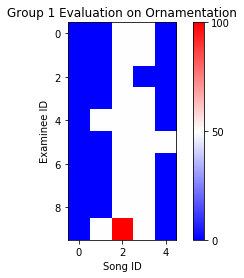

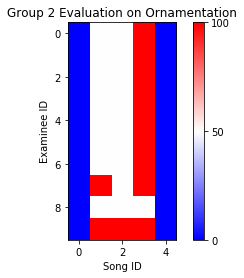

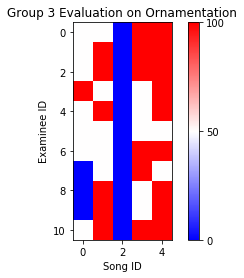

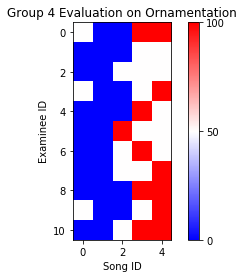

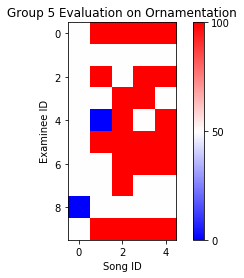

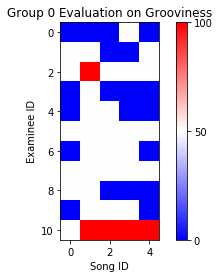

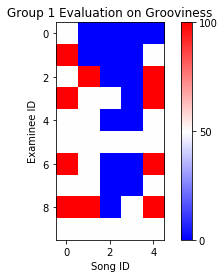

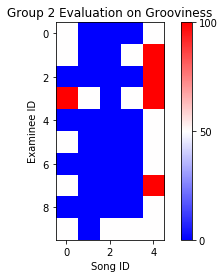

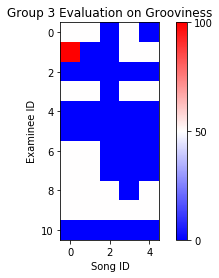

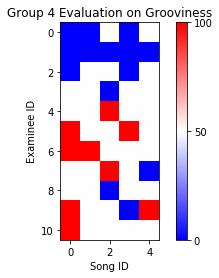

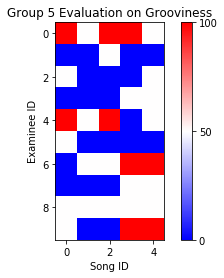

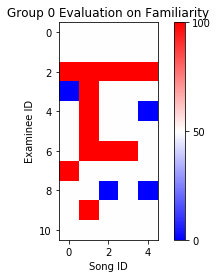

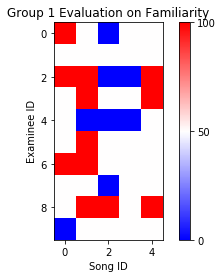

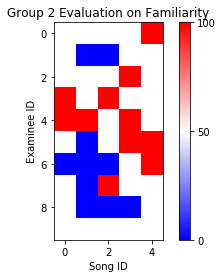

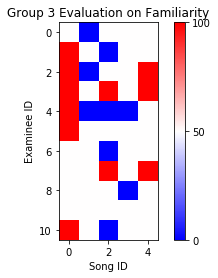

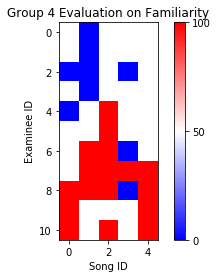

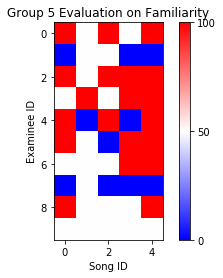

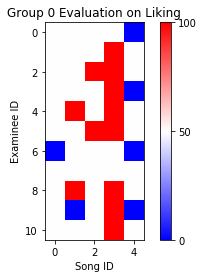

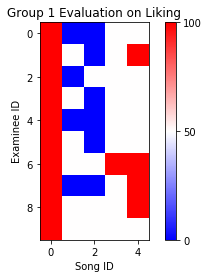

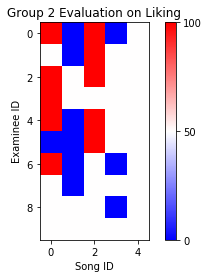

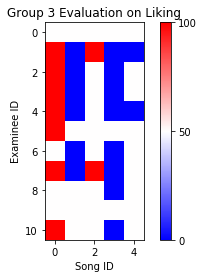

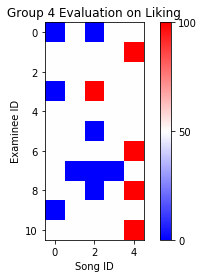

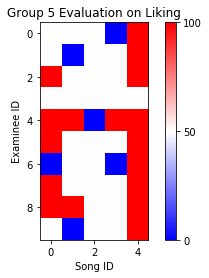

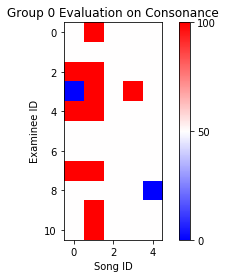

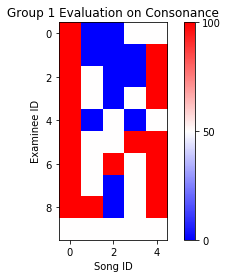

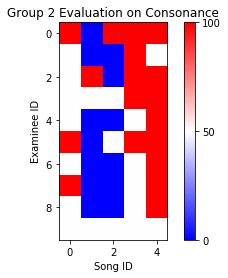

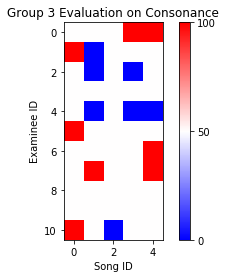

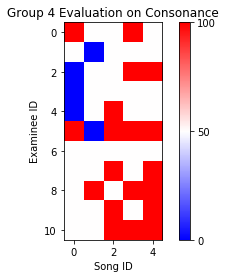

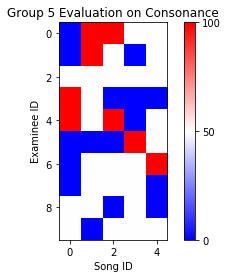

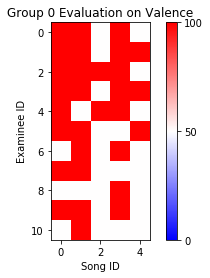

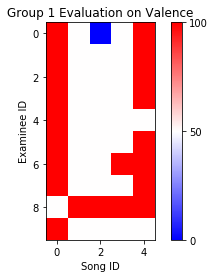

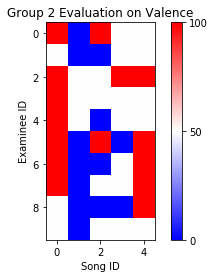

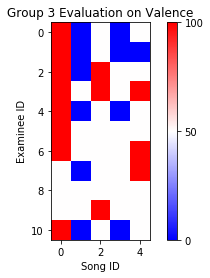

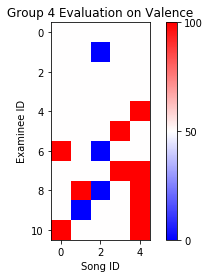

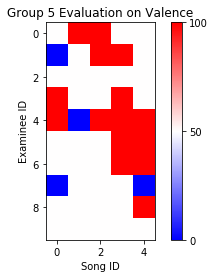

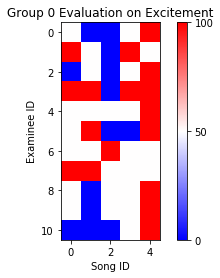

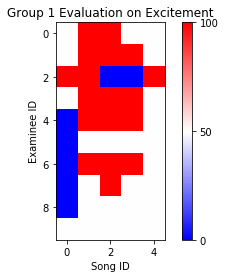

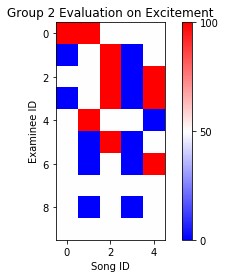

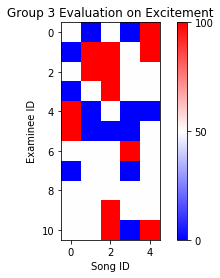

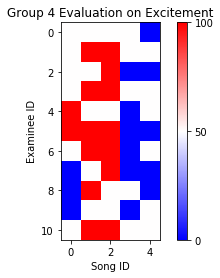

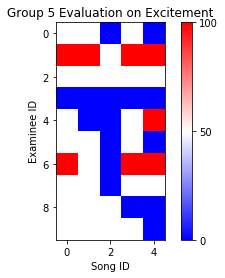

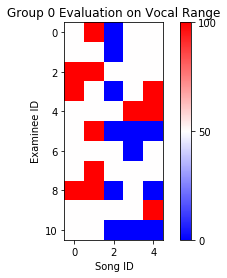

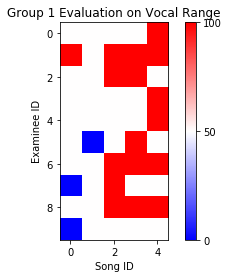

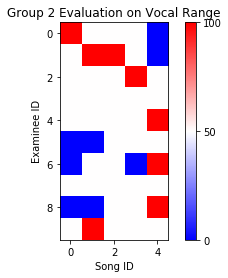

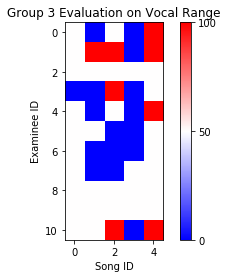

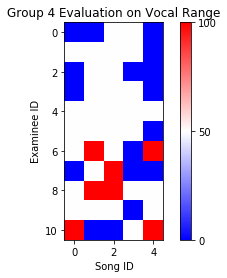

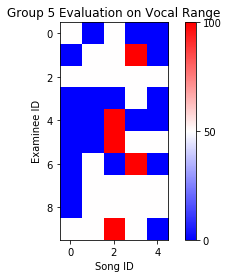

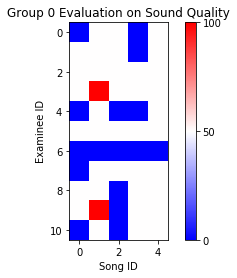

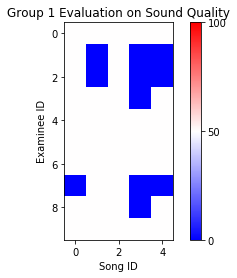

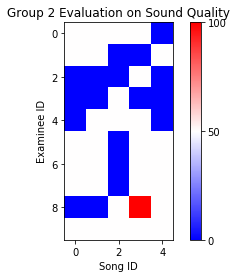

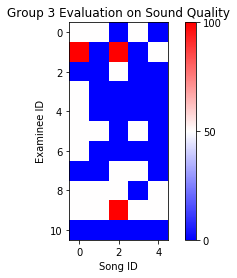

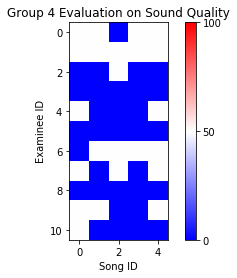

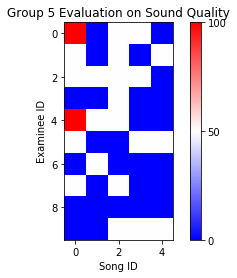

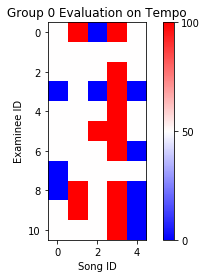

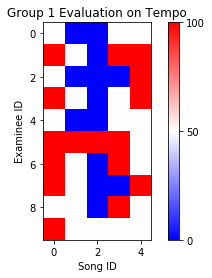

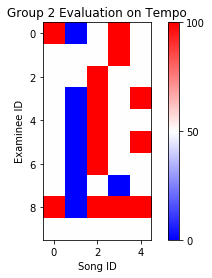

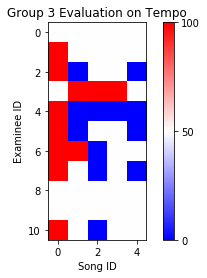

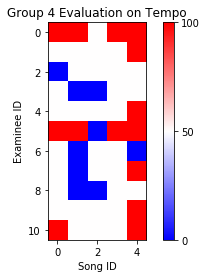

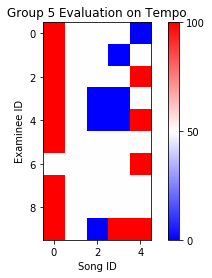

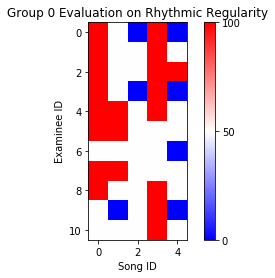

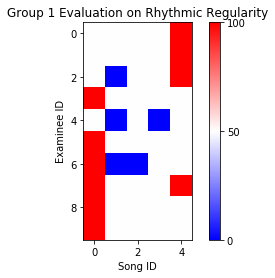

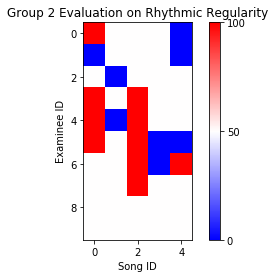

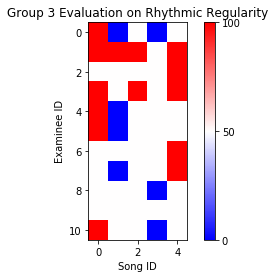

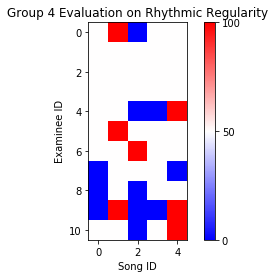

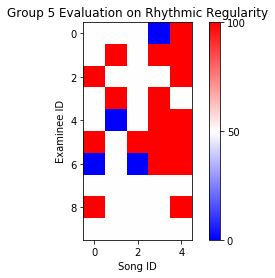

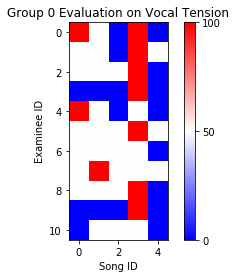

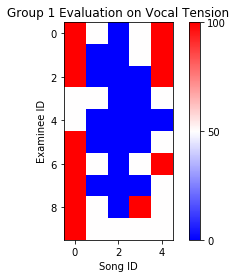

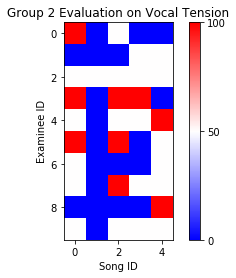

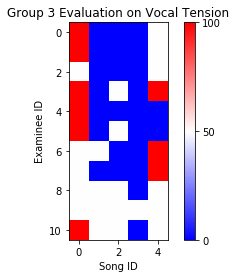

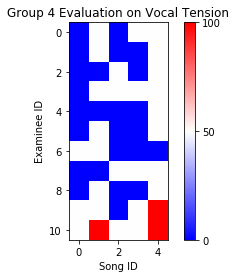

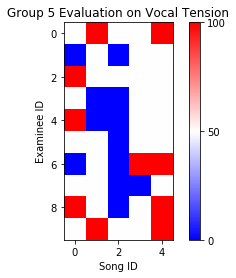

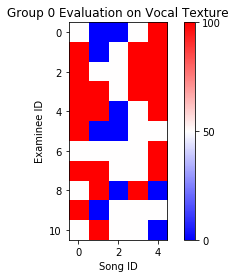

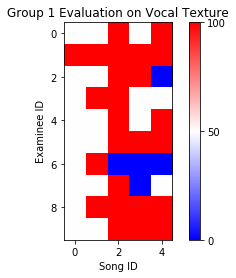

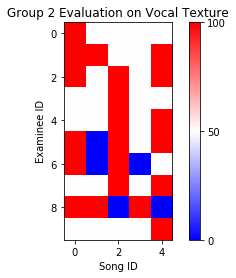

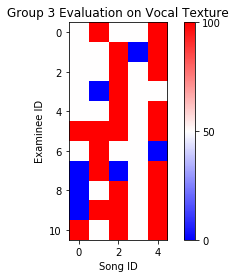

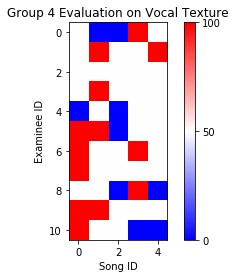

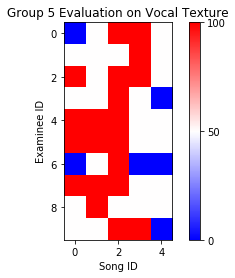

In [3]:
feature_names = ['Ornamentation', 'Grooviness', 'Familiarity', 'Liking', 'Consonance', 'Valence', 'Excitement', 'Vocal Range', 'Sound Quality', 'Tempo', 'Rhythmic Regularity', 'Vocal Tension', 'Vocal Texture']
for n in range(len(feature_names)):
    for i in range(GROUP):
        res = list()
        for j in range(MAX_PART):
            filename = './results/evaluation_' + str(i) + chr(65 + j) + '.csv'
            if not Path(filename).is_file():
                continue
            raw_data = pd.read_csv(filename, header=None).to_numpy(dtype=np.float32)[:, n + 1]
            res.append(raw_data)
        im = plt.imshow(np.array(res), cmap='bwr', interpolation='nearest', vmin=0, vmax=100)
        plt.title("Group " + str(i) + " Evaluation on " + feature_names[n])
        plt.xlabel("Song ID")
        plt.ylabel("Examinee ID")
        plt.colorbar(im, ticks=np.linspace(0, 100, num=3, endpoint=True))
        plt.savefig("./misc/Group " + str(i) + " Evaluation on " + feature_names[n] + ".png")
        plt.show()

## Evaluation Average Distance Matrix

In [4]:
average_evaluation_matrix = np.zeros((30, 30))
for i in range(GROUP):
    count = 0
    for j in range(MAX_PART):
        filename = './results/evaluation_' + str(i) + chr(65 + j) + '.csv'
        if not Path(filename).is_file():
            continue
        count += 1
        raw_data = pd.read_csv(filename, header=None).to_numpy(dtype=np.float32)[:, 1:14]
        raw_data = raw_data[:, [0, 7, 9, 10, 11, 12]]
        data = distance_matrix(raw_data, raw_data)
        data = data / np.max(data) * 100.0
        average_evaluation_matrix[i*5:(i+1)*5, i*5:(i+1)*5] += data
    average_evaluation_matrix[i*5:(i+1)*5, i*5:(i+1)*5] /= count

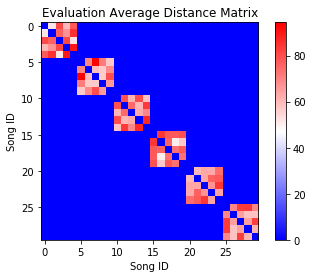

In [5]:
im = plt.imshow(average_evaluation_matrix, cmap='bwr', interpolation='nearest')
plt.colorbar(im)
plt.title("Evaluation Average Distance Matrix")
plt.xlabel("Song ID")
plt.ylabel("Song ID")
plt.savefig("./misc/Evaluation Average Distance Matrix.png")
plt.show()

## Pairwise Average Distance Matrix

In [6]:
average_pairwise_matrix = np.zeros((30, 30))
for i in range(GROUP):
    count = 0
    for j in range(MAX_PART):
        filename = './results/pairwise_distance_' + str(i) + chr(65 + j) + '.csv'
        if not Path(filename).is_file():
            continue
        count += 1
        data = np.nan_to_num(pd.read_csv(filename, header=None).to_numpy(), 0)
        average_pairwise_matrix[i*5:(i+1)*5, i*5:(i+1)*5] += data
    average_pairwise_matrix[i*5:(i+1)*5, i*5:(i+1)*5] /= count

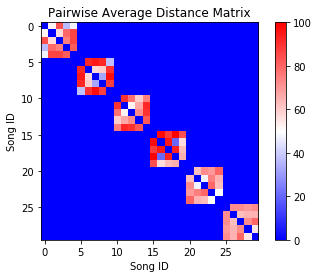

In [7]:
im = plt.imshow(average_pairwise_matrix, cmap='bwr', interpolation='nearest')
plt.colorbar(im)
plt.title("Pairwise Average Distance Matrix")
plt.xlabel("Song ID")
plt.ylabel("Song ID")
plt.savefig("./misc/Pairwise Average Distance Matrix.png")
plt.show()

## Triplet Average Distance Matrix

In [8]:
average_triplet_matrix = np.zeros((30, 30))
for i in range(GROUP):
    count = 0
    for j in range(MAX_PART):
        filename = './results/triple_distance_' + str(i) + chr(65 + j) + '.csv'
        if not Path(filename).is_file():
            continue
        count += 1
        data = np.nan_to_num(pd.read_csv(filename, header=None).to_numpy(), 0)
        average_triplet_matrix[i*5:(i+1)*5, i*5:(i+1)*5] += data
    average_triplet_matrix[i*5:(i+1)*5, i*5:(i+1)*5] /= count

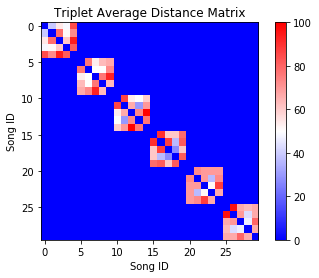

In [9]:
im = plt.imshow(average_triplet_matrix, cmap='bwr', interpolation='nearest')
plt.colorbar(im)
plt.title("Triplet Average Distance Matrix")
plt.xlabel("Song ID")
plt.ylabel("Song ID")
plt.savefig("./misc/Triplet Average Distance Matrix.png")
plt.show()

## Panteli Algorithm Distance Matrix

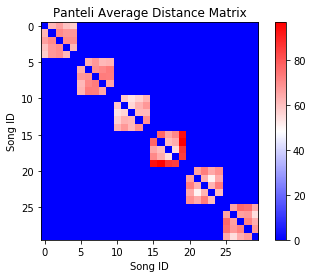

In [10]:
filename = './panteli.csv'
data = np.nan_to_num(pd.read_csv(filename, header=None).to_numpy(), 0)
average_panteli_matrix = np.zeros((30, 30))
for i in range(GROUP):
    average_panteli_matrix[i*5:(i+1)*5, i*5:(i+1)*5] = data[i*5:(i+1)*5, i*5:(i+1)*5]


im = plt.imshow(average_panteli_matrix * 100, cmap='bwr', interpolation='nearest')
plt.colorbar(im)
plt.title("Panteli Average Distance Matrix")
plt.xlabel("Song ID")
plt.ylabel("Song ID")
plt.savefig("./misc/Panteli Average Distance Matrix.png")
plt.show()

## Standard Error of Groups

In [11]:
std_errs = list()
std_errs_0 = list()
for i in range(GROUP):
    result = list()
    count = 0
    for j in range(MAX_PART):
        filename = './results/evaluation_' + str(i) + chr(65 + j) + '.csv'
        if not Path(filename).is_file():
            continue
        count += 1
        raw_data = pd.read_csv(filename, header=None).to_numpy(dtype=np.float32)[:, 1:14]
        raw_data = raw_data[:, [0, 7, 9, 10, 11, 12]]
        data = raw_data / np.max(raw_data) * 100.0
        result.append(data)
    std_err = np.std(np.array(result))
    std_errs_0.append(std_err)
    print("Evaluation Standard Error of Group " + str(i) + ":", std_err)
std_errs.append(std_errs_0)

Evaluation Standard Error of Group 0: 36.776695
Evaluation Standard Error of Group 1: 36.03085
Evaluation Standard Error of Group 2: 34.510464
Evaluation Standard Error of Group 3: 35.765602
Evaluation Standard Error of Group 4: 36.08765
Evaluation Standard Error of Group 5: 33.81157


In [12]:
std_errs_1 = list()
for i in range(GROUP):
    result = list()
    count = 0
    for j in range(MAX_PART):
        filename = './results/pairwise_distance_' + str(i) + chr(65 + j) + '.csv'
        if not Path(filename).is_file():
            continue
        count += 1
        raw_data = pd.read_csv(filename, header=None).to_numpy(dtype=np.float32)
        data = raw_data / np.max(data) * 100.0
        a = raw_data
        data = a[~np.eye(a.shape[0],dtype=bool)].reshape(a.shape[0],-1)
        result.append(data)
    std_err = np.std(result)
    std_errs_1.append(std_err)
    print("Pairwise Standard Error of Group " + str(i) + ":", std_err)
std_errs.append(std_errs_1)

Pairwise Standard Error of Group 0: 29.083805
Pairwise Standard Error of Group 1: 30.301609
Pairwise Standard Error of Group 2: 26.438608
Pairwise Standard Error of Group 3: 30.014631
Pairwise Standard Error of Group 4: 26.509432
Pairwise Standard Error of Group 5: 27.922884


In [13]:
std_errs_2 = list()
for i in range(GROUP):
    result = list()
    count = 0
    for j in range(MAX_PART):
        filename = './results/triple_distance_' + str(i) + chr(65 + j) + '.csv'
        if not Path(filename).is_file():
            continue
        count += 1
        raw_data = pd.read_csv(filename, header=None).to_numpy(dtype=np.float32)
        data = raw_data / np.max(data) * 100.0
        a = raw_data
        data = a[~np.eye(a.shape[0],dtype=bool)].reshape(a.shape[0],-1)
        result.append(data)
    std_err = np.std(np.array(result))
    std_errs_2.append(std_err)
    print("Triple Standard Error of Group " + str(i) + ":", std_err)
std_errs.append(std_errs_2)

Triple Standard Error of Group 0: 27.70421
Triple Standard Error of Group 1: 20.545992
Triple Standard Error of Group 2: 25.817308
Triple Standard Error of Group 3: 26.58814
Triple Standard Error of Group 4: 26.205559
Triple Standard Error of Group 5: 26.244068


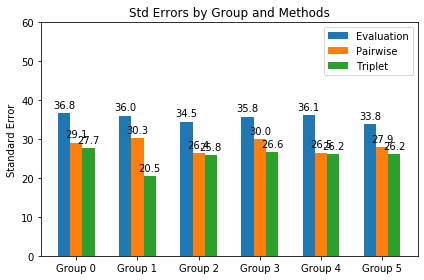

In [14]:
labels = ['Group 0', 'Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects0 = ax.bar(x - width, np.array(std_errs_0), width, label='Evaluation')
rects1 = ax.bar(x, np.array(std_errs_1), width, label='Pairwise')
rects2 = ax.bar(x + width, np.array(std_errs_2), width, label='Triplet')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Standard Error')
ax.set_title('Std Errors by Group and Methods')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects0)
autolabel(rects1)
autolabel(rects2)
ax.set_ylim([0, 60])

fig.tight_layout()
plt.savefig("./misc/Std Errors by Group and Methods.png")

plt.show()

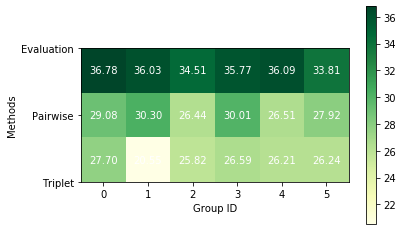

In [15]:
res = np.array(std_errs)
im = plt.imshow(res, cmap='YlGn', interpolation='nearest')
plt.colorbar(im)
plt.xlabel("Group ID")
plt.yticks([-0.5, 1, 2.5], ['Evaluation','Pairwise','Triplet'])
plt.ylabel("Methods")
for i in range(res.shape[0]):
    for j in range(res.shape[1]):
        text = plt.text(j, i, '{0:.2f}'.format(res[i, j]),
                       ha="center", va="center", color="w")
plt.savefig("./misc/Triplet Group " + str(i) + " r-value p-value.png")
plt.show()

## Evaluation Dendrogram for Each Group

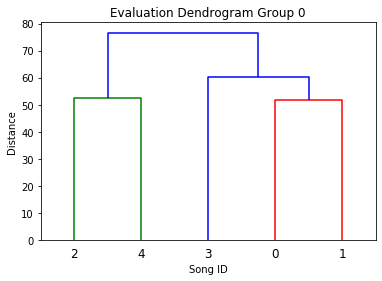

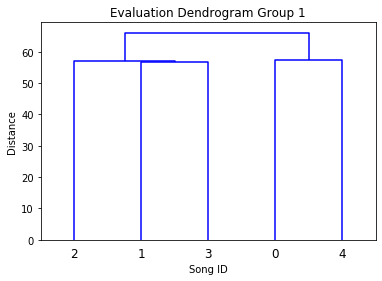

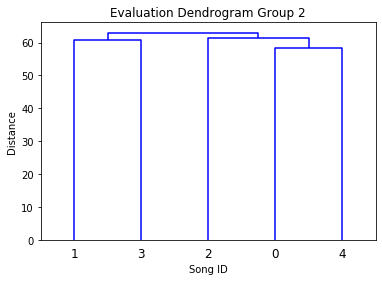

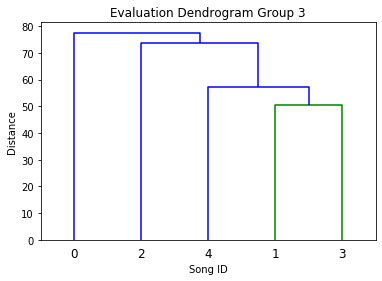

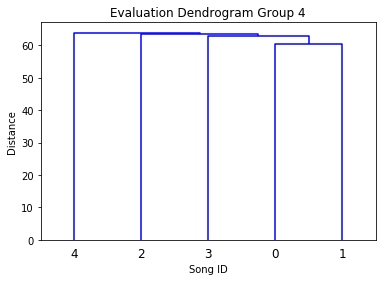

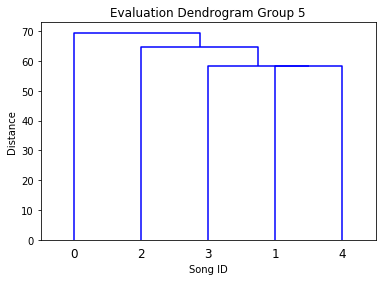

In [16]:
for i in range(GROUP):
    average_evaluation_matrix = np.zeros((5, 5))
    count = 0
    for j in range(MAX_PART):
        filename = './results/evaluation_' + str(i) + chr(65 + j) + '.csv'
        if not Path(filename).is_file():
            continue
        count += 1
        raw_data = pd.read_csv(filename, header=None).to_numpy(dtype=np.float32)[:, 1:14]
        raw_data = raw_data[:, [0, 7, 9, 10, 11, 12]]
        data = distance_matrix(raw_data, raw_data)
        data = data / np.max(data) * 100.0
        average_evaluation_matrix += data
    average_evaluation_matrix /= count
    dists = squareform(average_evaluation_matrix)
    linkage_matrix = linkage(dists, "single")
    dendrogram(linkage_matrix, labels=["0", "1", "2", "3", "4"])
    plt.title("Evaluation Dendrogram Group " + str(i))
    plt.xlabel("Song ID")
    plt.ylabel("Distance")
    plt.savefig("./misc/Evaluation Dendrogram Group " + str(i) + ".png")
    plt.show()

## Pairwise Dendrogram for Each Group

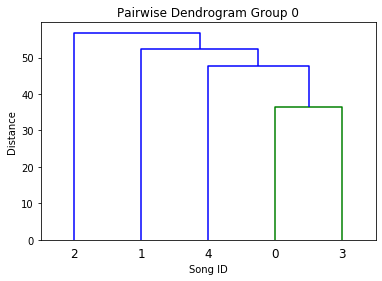

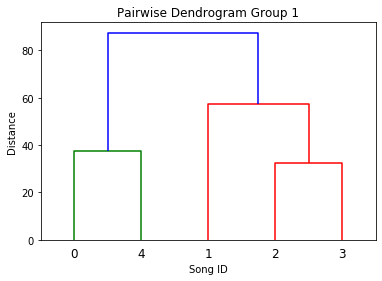

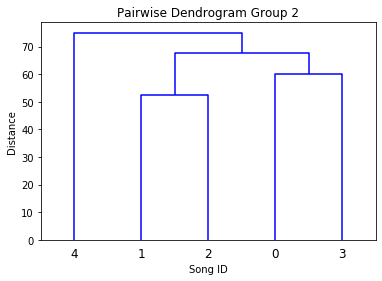

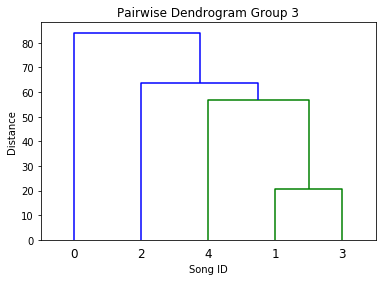

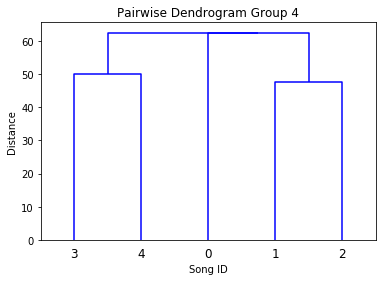

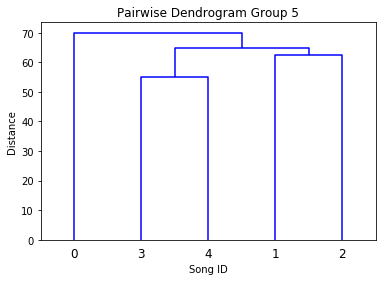

In [17]:
for i in range(GROUP):
    average_group_pairwise_matrix = np.zeros((5, 5))
    count = 0
    for j in range(MAX_PART):
        filename = './results/pairwise_distance_' + str(i) + chr(65 + j) + '.csv'
        if not Path(filename).is_file():
            continue
        count += 1
        data = np.nan_to_num(pd.read_csv(filename, header=None).to_numpy(), 0)
        average_group_pairwise_matrix += data
    average_group_pairwise_matrix /= count
    dists = squareform(average_group_pairwise_matrix)
    linkage_matrix = linkage(dists, "single")
    dendrogram(linkage_matrix, labels=["0", "1", "2", "3", "4"])
    plt.title("Pairwise Dendrogram Group " + str(i))
    plt.xlabel("Song ID")
    plt.ylabel("Distance")
    plt.savefig("./misc/Pairwise Dendrogram Group " + str(i) + ".png")
    plt.show()

## Triplet Dendrogram for Each Group

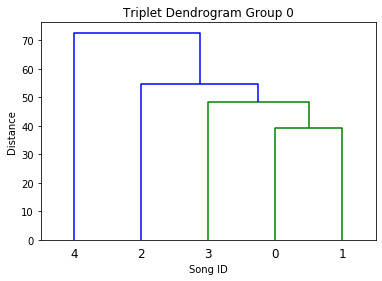

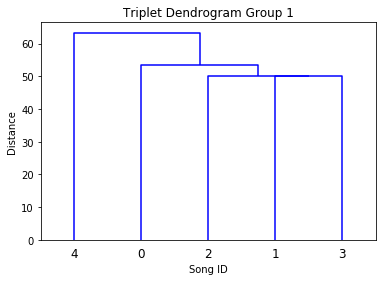

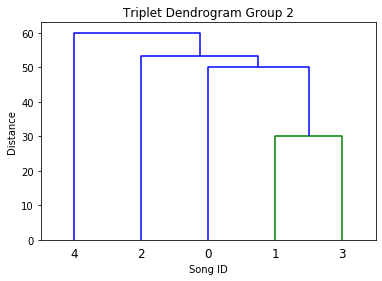

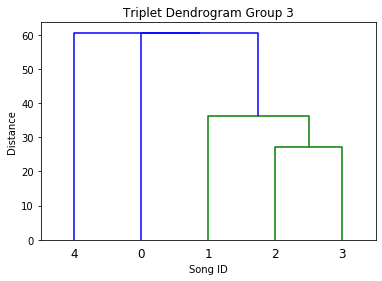

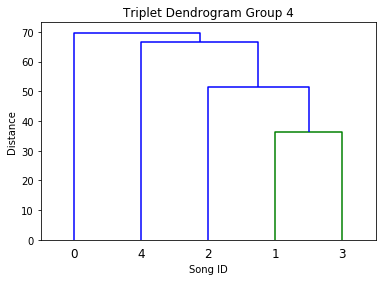

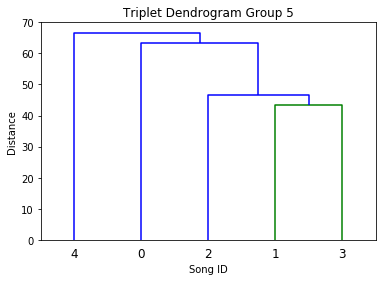

In [18]:
for i in range(GROUP):
    average_group_triplet_matrix = np.zeros((5, 5))
    count = 0
    for j in range(MAX_PART):
        filename = './results/triple_distance_' + str(i) + chr(65 + j) + '.csv'
        if not Path(filename).is_file():
            continue
        count += 1
        data = np.nan_to_num(pd.read_csv(filename, header=None).to_numpy(), 0)
        average_group_triplet_matrix += data
    average_group_triplet_matrix /= count
    dists = squareform(average_group_triplet_matrix)
    linkage_matrix = linkage(dists, "single")
    dendrogram(linkage_matrix, labels=["0", "1", "2", "3", "4"])
    plt.title("Triplet Dendrogram Group " + str(i))
    plt.xlabel("Song ID")
    plt.ylabel("Distance")
    plt.savefig("./misc/Triplet Dendrogram Group " + str(i) + ".png")
    plt.show()

## Do People Agree with Each Other in Evaluation Test? (Reliability)

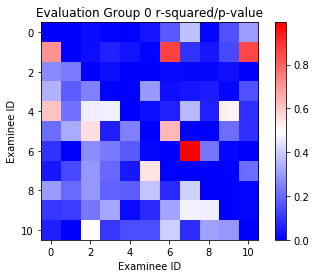

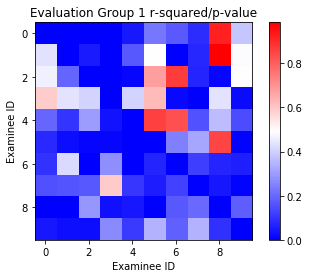

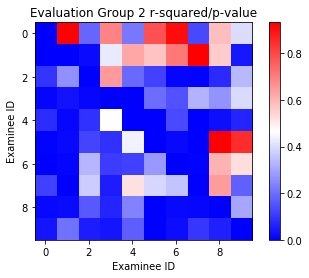

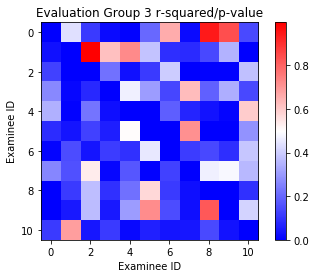

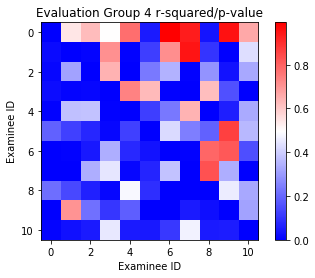

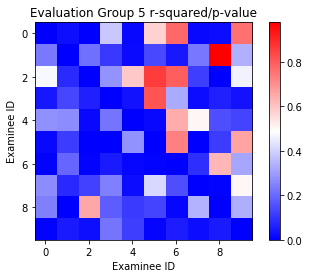

In [19]:
for i in range(GROUP):
    res = list()
    for j in range(MAX_PART):
        filename = './results/evaluation_' + str(i) + chr(65 + j) + '.csv'
        if not Path(filename).is_file():
            continue
        count += 1
        raw_data = pd.read_csv(filename, header=None).to_numpy(dtype=np.float32)[:, 1:14]
        raw_data = raw_data[:, [0, 7, 9, 10, 11, 12]]
        data = distance_matrix(raw_data, raw_data)
        data = data / np.max(data) * 100.0
        a = data
        res.append(a[~np.eye(a.shape[0],dtype=bool)].reshape(a.shape[0],-1))
    r_matrix = np.zeros((len(res), len(res)))
    for x in range(len(res)):
        for y in range(len(res)):
            slope, intercept, r_value, p_value, std_err = stats.linregress(res[x].flatten(), res[y].flatten())
            r_matrix[x, y] = r_value ** 2
            r_matrix[y, x] = p_value
    im = plt.imshow(r_matrix, cmap='bwr', interpolation='nearest')
    plt.title("Evaluation Group " + str(i) + " r-squared/p-value")
    plt.colorbar(im)
    plt.xlabel("Examinee ID")
    plt.ylabel("Examinee ID")
    plt.savefig("./misc/Evaluation Group " + str(i) + " r-value p-value.png")
    plt.show()

## Do People Agree with Each Other in Pairwise Test? (Reliability)

[100. 100.   0. 100. 100.   0. 100. 100. 100.   0. 100. 100.   0. 100.
 100. 100. 100. 100. 100. 100.]
[[100. 100.   0. 100.]
 [100.   0. 100. 100.]
 [100.   0. 100. 100.]
 [  0. 100. 100. 100.]
 [100. 100. 100. 100.]]
[ 75.  50.  25.  25.  75. 100. 100. 100.  50. 100.  50.  75.  25. 100.
  50.  50.  25. 100.  75.  50.]
[[ 75.  50.  25.  25.]
 [ 75. 100. 100. 100.]
 [ 50. 100.  50.  75.]
 [ 25. 100.  50.  50.]
 [ 25. 100.  75.  50.]]
[ 75.  75.  75. 100.  75.  50. 100. 100.  75.  50. 100. 100.  75. 100.
 100.  75. 100. 100. 100.  75.]
[[ 75.  75.  75. 100.]
 [ 75.  50. 100. 100.]
 [ 75.  50. 100. 100.]
 [ 75. 100. 100.  75.]
 [100. 100. 100.  75.]]
[ 75. 100.  25.  25.  75. 100. 100.  75. 100. 100.  75.  75.  25. 100.
  75.  75.  25.  75.  75.  75.]
[[ 75. 100.  25.  25.]
 [ 75. 100. 100.  75.]
 [100. 100.  75.  75.]
 [ 25. 100.  75.  75.]
 [ 25.  75.  75.  75.]]
[ 25. 100.  75.   0.  25.  25.  75. 100. 100.  25. 100. 100.  75.  75.
 100. 100.   0. 100. 100. 100.]
[[ 25. 100.  75.   0.

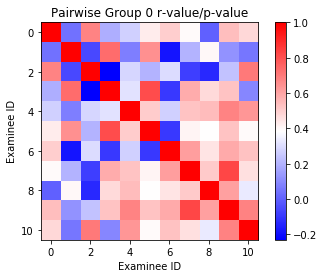

[100. 100.  75.   0. 100.  25.  50.  50. 100.  25.  25. 100.  75.  50.
  25.  75.   0.  50. 100.  75.]
[[100. 100.  75.   0.]
 [100.  25.  50.  50.]
 [100.  25.  25. 100.]
 [ 75.  50.  25.  75.]
 [  0.  50. 100.  75.]]
[100. 100. 100.  25. 100.  50.  75. 100. 100.  50.  25. 100. 100.  75.
  25. 100.  25. 100. 100. 100.]
[[100. 100. 100.  25.]
 [100.  50.  75. 100.]
 [100.  50.  25. 100.]
 [100.  75.  25. 100.]
 [ 25. 100. 100. 100.]]
[ 75.  75. 100.  75.  75.  75.  75.  75.  75.  75.  75.  75. 100.  75.
  75.  75.  75.  75.  75.  75.]
[[ 75.  75. 100.  75.]
 [ 75.  75.  75.  75.]
 [ 75.  75.  75.  75.]
 [100.  75.  75.  75.]
 [ 75.  75.  75.  75.]]
[100. 100. 100. 100. 100. 100. 100. 100. 100. 100.  50. 100. 100. 100.
  50. 100. 100. 100. 100. 100.]
[[100. 100. 100. 100.]
 [100. 100. 100. 100.]
 [100. 100.  50. 100.]
 [100. 100.  50. 100.]
 [100. 100. 100. 100.]]
[100. 100. 100.  25. 100.  75.  75. 100. 100.  75.  25. 100. 100.  75.
  25. 100.  25. 100. 100. 100.]
[[100. 100. 100.  25.

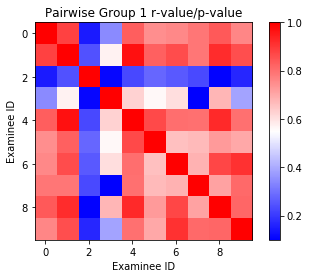

[ 75.  75.  75. 100.  75.  50.  50. 100.  75.  50.  50. 100.  75.  50.
  50. 100. 100. 100. 100. 100.]
[[ 75.  75.  75. 100.]
 [ 75.  50.  50. 100.]
 [ 75.  50.  50. 100.]
 [ 75.  50.  50. 100.]
 [100. 100. 100. 100.]]
[100. 100.  25.  75. 100.  75.  25.  75. 100.  75.  75. 100.  25.  25.
  75.  50.  75.  75. 100.  50.]
[[100. 100.  25.  75.]
 [100.  75.  25.  75.]
 [100.  75.  75. 100.]
 [ 25.  25.  75.  50.]
 [ 75.  75. 100.  50.]]
[100.  75. 100.  50. 100.  50.  75. 100.  75.  50.  75. 100. 100.  75.
  75. 100.  50. 100. 100. 100.]
[[100.  75. 100.  50.]
 [100.  50.  75. 100.]
 [ 75.  50.  75. 100.]
 [100.  75.  75. 100.]
 [ 50. 100. 100. 100.]]
[ 75.  25.  75. 100.  75.  50.  25.  75.  25.  50.  50.  75.  75.  25.
  50.  75. 100.  75.  75.  75.]
[[ 75.  25.  75. 100.]
 [ 75.  50.  25.  75.]
 [ 25.  50.  50.  75.]
 [ 75.  25.  50.  75.]
 [100.  75.  75.  75.]]
[100. 100. 100. 100. 100. 100.  75. 100. 100. 100. 100. 100. 100.  75.
 100. 100. 100. 100. 100. 100.]
[[100. 100. 100. 100.

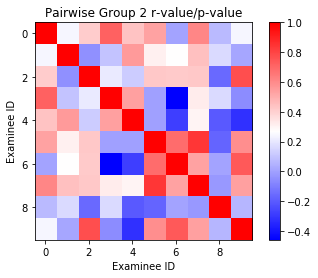

[100. 100. 100. 100. 100.  75.  25.  75. 100.  75.  75.  75. 100.  25.
  75.  50. 100.  75.  75.  50.]
[[100. 100. 100. 100.]
 [100.  75.  25.  75.]
 [100.  75.  75.  75.]
 [100.  25.  75.  50.]
 [100.  75.  75.  50.]]
[100.  75. 100. 100. 100. 100.   0.  25.  75. 100. 100. 100. 100.   0.
 100.  25. 100.  25. 100.  25.]
[[100.  75. 100. 100.]
 [100. 100.   0.  25.]
 [ 75. 100. 100. 100.]
 [100.   0. 100.  25.]
 [100.  25. 100.  25.]]
[100. 100. 100. 100. 100. 100.  25. 100. 100. 100. 100.  50. 100.  25.
 100. 100. 100. 100.  50. 100.]
[[100. 100. 100. 100.]
 [100. 100.  25. 100.]
 [100. 100. 100.  50.]
 [100.  25. 100. 100.]
 [100. 100.  50. 100.]]
[100. 100. 100.  50. 100. 100.   0.  75. 100. 100.  75.  50. 100.   0.
  75. 100.  50.  75.  50. 100.]
[[100. 100. 100.  50.]
 [100. 100.   0.  75.]
 [100. 100.  75.  50.]
 [100.   0.  75. 100.]
 [ 50.  75.  50. 100.]]
[100. 100. 100. 100. 100. 100.   0.  25. 100. 100. 100.  50. 100.   0.
 100.  25. 100.  25.  50.  25.]
[[100. 100. 100. 100.

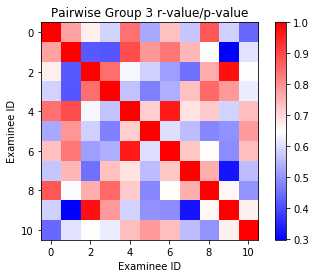

[75. 75. 75. 75. 75. 75. 75. 75. 75. 75. 75. 75. 75. 75. 75. 75. 75. 75.
 75. 75.]
[[75. 75. 75. 75.]
 [75. 75. 75. 75.]
 [75. 75. 75. 75.]
 [75. 75. 75. 75.]
 [75. 75. 75. 75.]]
[ 25.  25. 100. 100.  25.  25.  75.  75.  25.  25. 100. 100. 100.  75.
 100.  75. 100.  75. 100.  75.]
[[ 25.  25. 100. 100.]
 [ 25.  25.  75.  75.]
 [ 25.  25. 100. 100.]
 [100.  75. 100.  75.]
 [100.  75. 100.  75.]]
[ 75.  75.  50. 100.  75.  75. 100.  75.  75.  75.  75.  50.  50. 100.
  75.  25. 100.  75.  50.  25.]
[[ 75.  75.  50. 100.]
 [ 75.  75. 100.  75.]
 [ 75.  75.  75.  50.]
 [ 50. 100.  75.  25.]
 [100.  75.  50.  25.]]
[100. 100. 100. 100. 100.  50.  75.  50. 100.  50. 100.  50. 100.  75.
 100.  25. 100.  50.  50.  25.]
[[100. 100. 100. 100.]
 [100.  50.  75.  50.]
 [100.  50. 100.  50.]
 [100.  75. 100.  25.]
 [100.  50.  50.  25.]]
[ 50. 100. 100.  75.  50.  25. 100.  75. 100.  25. 100.  50. 100. 100.
 100.  50.  75.  75.  50.  50.]
[[ 50. 100. 100.  75.]
 [ 50.  25. 100.  75.]
 [100.  25. 100

/Users/delton/WorkSpace/Keio/yamaha-results/venv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/delton/WorkSpace/Keio/yamaha-results/venv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/delton/WorkSpace/Keio/yamaha-results/venv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


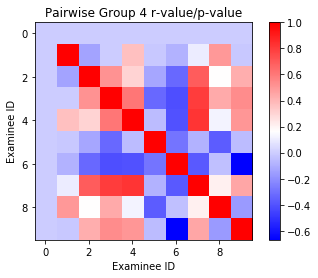

[100. 100.  25.  75. 100.  25.  75. 100. 100.  25. 100. 100.  25.  75.
 100.  25.  75. 100. 100.  25.]
[[100. 100.  25.  75.]
 [100.  25.  75. 100.]
 [100.  25. 100. 100.]
 [ 25.  75. 100.  25.]
 [ 75. 100. 100.  25.]]
[ 75.  25.  25.  50.  75.  75.  25.  50.  25.  75.  75. 100.  25.  25.
  75.  25.  50.  50. 100.  25.]
[[ 75.  25.  25.  50.]
 [ 75.  75.  25.  50.]
 [ 25.  75.  75. 100.]
 [ 25.  25.  75.  25.]
 [ 50.  50. 100.  25.]]
[100. 100. 100.  75. 100.  75. 100.  75. 100.  75. 100. 100. 100. 100.
 100. 100.  75.  75. 100. 100.]
[[100. 100. 100.  75.]
 [100.  75. 100.  75.]
 [100.  75. 100. 100.]
 [100. 100. 100. 100.]
 [ 75.  75. 100. 100.]]
[100. 100. 100.  75. 100. 100.  75. 100. 100. 100. 100. 100. 100.  75.
 100. 100.  75. 100. 100. 100.]
[[100. 100. 100.  75.]
 [100. 100.  75. 100.]
 [100. 100. 100. 100.]
 [100.  75. 100. 100.]
 [ 75. 100. 100. 100.]]
[  0.  25.  75. 100.   0.  25.  75. 100.  25.  25.  75.  75.  75.  75.
  75.   0. 100. 100.  75.   0.]
[[  0.  25.  75. 100.

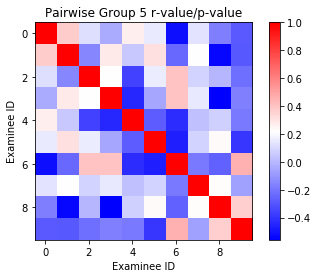

In [20]:
for i in range(GROUP):
    res = list()
    for j in range(MAX_PART):
        filename = './results/pairwise_distance_' + str(i) + chr(65 + j) + '.csv'
        if not Path(filename).is_file():
            continue
        data = np.nan_to_num(pd.read_csv(filename, header=None).to_numpy(), 0)
        a = data
        print(a[~np.eye(a.shape[0],dtype=bool)])
        print(a[~np.eye(a.shape[0],dtype=bool)].reshape(a.shape[0],-1))
        res.append(a[~np.eye(a.shape[0],dtype=bool)].reshape(a.shape[0],-1))
    r_matrix = np.zeros((len(res), len(res)))
    for x in range(len(res)):
        for y in range(len(res)):
            slope, intercept, r_value, p_value, std_err = stats.linregress(res[x].flatten(), res[y].flatten())
            r_matrix[x, y] = r_value
#             r_matrix[y, x] = p_value
    im = plt.imshow(r_matrix, cmap='bwr', interpolation='nearest')
    plt.title("Pairwise Group " + str(i) + " r-value/p-value")
    plt.colorbar(im)
    plt.xlabel("Examinee ID")
    plt.ylabel("Examinee ID")
    plt.savefig("./misc/Pairwise Group " + str(i) + " r-value p-value.png")
    plt.show()

## Do People Agree with Each Other in Triplet Test? (Reliability)

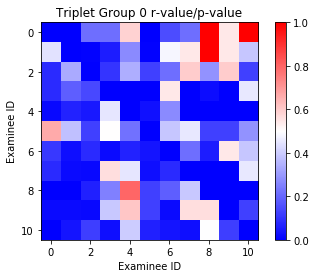

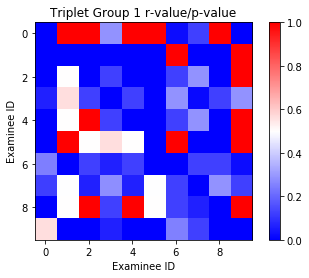

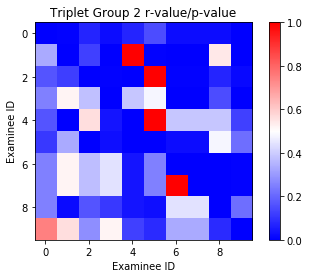

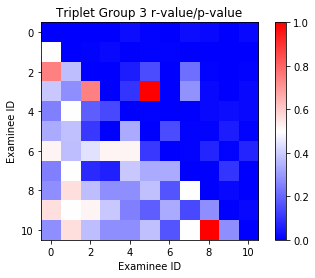

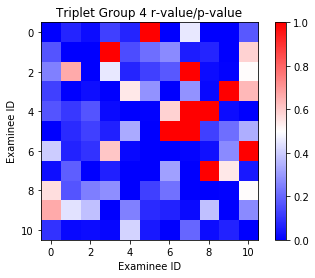

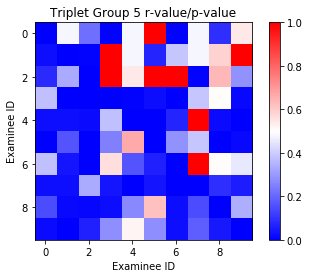

In [21]:
for i in range(GROUP):
    res = list()
    for j in range(MAX_PART):
        filename = './results/triple_distance_' + str(i) + chr(65 + j) + '.csv'
        if not Path(filename).is_file():
            continue
        data = np.nan_to_num(pd.read_csv(filename, header=None).to_numpy(), 0)
        a = data
        res.append(a[~np.eye(a.shape[0],dtype=bool)].reshape(a.shape[0],-1))
    r_matrix = np.zeros((len(res), len(res)))
    for x in range(len(res)):
        for y in range(len(res)):
            slope, intercept, r_value, p_value, std_err = stats.linregress(res[x].flatten(), res[y].flatten())
            r_matrix[x, y] = r_value ** 2
            r_matrix[y, x] = p_value
    im = plt.imshow(r_matrix, cmap='bwr', interpolation='nearest')
    plt.title("Triplet Group " + str(i) + " r-value/p-value")
    plt.colorbar(im)
    plt.xlabel("Examinee ID")
    plt.ylabel("Examinee ID")
    plt.savefig("./misc/Triplet Group " + str(i) + " r-value p-value.png")
    plt.show()

## Do People Agree with Themselves? (Pairwise v.s. Triplet v.s. Evaluation, Individual)

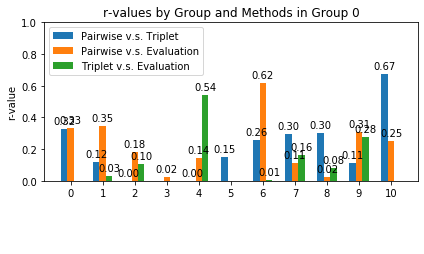

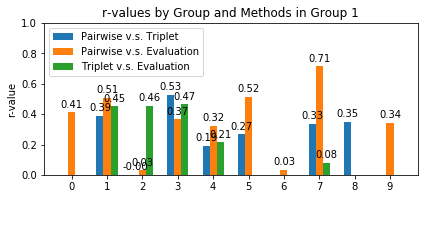

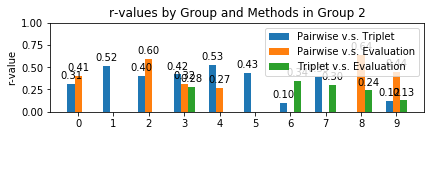

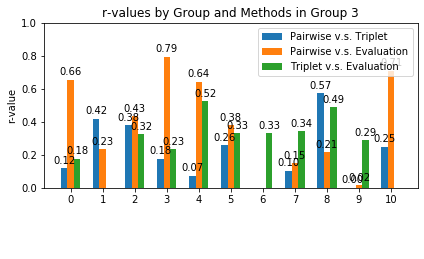

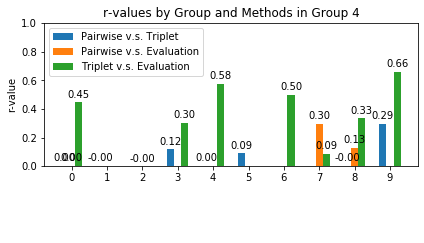

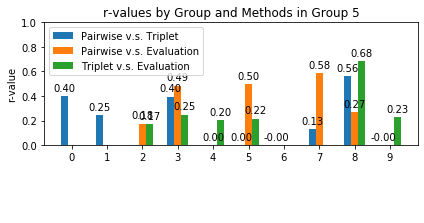

In [22]:
for i in range(GROUP):
    r_0 = list()
    r_1 = list()
    r_2 = list()
    average_group_pairwise_matrix = np.zeros((5, 5))
    count = 0
    for j in range(MAX_PART):
        filename_1 = './results/pairwise_distance_' + str(i) + chr(65 + j) + '.csv'
        filename_2 = './results/triple_distance_' + str(i) + chr(65 + j) + '.csv'
        filename_3 = './results/evaluation_' + str(i) + chr(65 + j) + '.csv'
        if not (Path(filename_1).is_file() and Path(filename_2).is_file() and Path(filename_3).is_file()):
            continue
        data_1 = np.nan_to_num(pd.read_csv(filename_1, header=None).to_numpy(), 0)
        data_2 = np.nan_to_num(pd.read_csv(filename_2, header=None).to_numpy(), 0)
        raw_data = pd.read_csv(filename_3, header=None).to_numpy(dtype=np.float32)[:, 1:14]
        raw_data = raw_data[:, [0, 7, 9, 10, 11, 12]]
        data_3 = distance_matrix(raw_data, raw_data)
        data_3 = data_3 / np.max(data_3) * 100.0
        
        a = data_1
        data_1 = a[~np.eye(a.shape[0],dtype=bool)].reshape(a.shape[0],-1)
        a = data_2
        data_2 = a[~np.eye(a.shape[0],dtype=bool)].reshape(a.shape[0],-1)
        a = data_3
        data_3 = a[~np.eye(a.shape[0],dtype=bool)].reshape(a.shape[0],-1)

        slope, intercept, r_value, p_value, std_err = stats.linregress(data_1.flatten(), data_2.flatten())
        r_0.append(r_value)
        slope, intercept, r_value, p_value, std_err = stats.linregress(data_1.flatten(), data_3.flatten())
        r_1.append(r_value)        
        slope, intercept, r_value, p_value, std_err = stats.linregress(data_2.flatten(), data_3.flatten())
        r_2.append(r_value)
    x = np.arange(len(r_0))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots()
    rects0 = ax.bar(x - width, np.array(r_0), width, label='Pairwise v.s. Triplet')
    rects1 = ax.bar(x, np.array(r_1), width, label='Pairwise v.s. Evaluation')
    rects2 = ax.bar(x + width, np.array(r_2), width, label='Triplet v.s. Evaluation')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('r-value')
    ax.set_title('r-values by Group and Methods in Group ' + str(i))
    ax.set_xticks(x)
    ax.legend()


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{0:.2f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects0)
    autolabel(rects1)
    autolabel(rects2)
    ax.set_ylim([0, 1])

    fig.tight_layout()
    plt.savefig('./misc/r-values by Group and Methods in Group ' + str(i) + '.png')

    plt.show()

## Do People Agree with Themselves? (Pairwise v.s. Triplet v.s Evaluation, Group Average)

In [23]:
r_0 = list()
r_1 = list()
r_2 = list()
r_3 = list()

r_e0 = list()
r_e1 = list()
r_e2 = list()
r_e3 = list()

for i in range(GROUP):
    average_group_pairwise_matrix = np.zeros((5, 5))
    count_1 = 0
    for j in range(MAX_PART):
        filename = './results/pairwise_distance_' + str(i) + chr(65 + j) + '.csv'
        if not Path(filename).is_file():
            continue
        count_1 += 1
        data = np.nan_to_num(pd.read_csv(filename, header=None).to_numpy(), 0)
        average_group_pairwise_matrix += data
    average_group_pairwise_matrix /= count_1
    
    a = average_group_pairwise_matrix
    average_group_pairwise_matrix = a[~np.eye(a.shape[0],dtype=bool)].reshape(a.shape[0],-1)
    
    average_group_triplet_matrix = np.zeros((5, 5))
    count_2 = 0
    for j in range(MAX_PART):
        filename = './results/triple_distance_' + str(i) + chr(65 + j) + '.csv'
        if not Path(filename).is_file():
            continue
        count_2 += 1
        data = np.nan_to_num(pd.read_csv(filename, header=None).to_numpy(), 0)
        average_group_triplet_matrix += data
    average_group_triplet_matrix /= count_2
    
    a = average_group_triplet_matrix
    average_group_triplet_matrix = a[~np.eye(a.shape[0],dtype=bool)].reshape(a.shape[0],-1)
    
    average_evaluation_matrix = np.zeros((5, 5))
    count_3 = 0
    for j in range(MAX_PART):
        filename = './results/evaluation_' + str(i) + chr(65 + j) + '.csv'
        if not Path(filename).is_file():
            continue
        count_3 += 1
        raw_data = pd.read_csv(filename, header=None).to_numpy(dtype=np.float32)[:, 1:14]
        raw_data = raw_data[:, [0, 7, 9, 10, 11, 12]]
        data = distance_matrix(raw_data, raw_data)
        data = data / np.max(data) * 100.0
        average_evaluation_matrix += data
    average_evaluation_matrix /= count_3
    
    a = average_evaluation_matrix
    average_evaluation_matrix = a[~np.eye(a.shape[0],dtype=bool)].reshape(a.shape[0],-1)
    
    filename = './panteli.csv'
    data = np.nan_to_num(pd.read_csv(filename, header=None).to_numpy(), 0)
    average_panteli_matrix = data[i*5:(i+1)*5, i*5:(i+1)*5] * 100
    
    a = average_panteli_matrix
    average_panteli_matrix = a[~np.eye(a.shape[0],dtype=bool)].reshape(a.shape[0],-1)

    
    slope, intercept, r_value, p_value, std_err = stats.linregress(average_group_pairwise_matrix.flatten(), average_group_triplet_matrix.flatten())
    print("Group " + str(i) + ":", "r-value:", "%.2f" % r_value, "p-value:", "%.10f" % p_value, "std_err:", "%.2f" % std_err)
    r_0.append(r_value)
    r_e0.append(std_err)
    slope, intercept, r_value, p_value, std_err = stats.linregress(average_group_pairwise_matrix.flatten(), average_evaluation_matrix.flatten())
    print("Group " + str(i) + ":", "r-value:", "%.2f" % r_value, "p-value:", "%.10f" % p_value, "std_err:", "%.2f" % std_err)
    r_1.append(r_value)
    r_e1.append(std_err)
    slope, intercept, r_value, p_value, std_err = stats.linregress(average_evaluation_matrix.flatten(), average_group_triplet_matrix.flatten())
    print("Group " + str(i) + ":", "r-value:", "%.2f" % r_value, "p-value:", "%.10f" % p_value, "std_err:", "%.2f" % std_err)
    r_2.append(r_value)
    r_e2.append(std_err)
    slope, intercept, r_value, p_value, std_err = stats.linregress(average_evaluation_matrix.flatten(), average_panteli_matrix.flatten())
    print("Group " + str(i) + ":", "r-value:", "%.2f" % r_value, "p-value:", "%.10f" % p_value, "std_err:", "%.2f" % std_err)
    r_3.append(r_value)
    r_e3.append(std_err)
    print()

Group 0: r-value: 0.30 p-value: 0.1987849628 std_err: 0.22
Group 0: r-value: 0.35 p-value: 0.1251891608 std_err: 0.16
Group 0: r-value: 0.30 p-value: 0.2001003735 std_err: 0.30
Group 0: r-value: 0.07 p-value: 0.7689339245 std_err: 0.08

Group 1: r-value: 0.20 p-value: 0.3949381006 std_err: 0.13
Group 1: r-value: 0.76 p-value: 0.0000864459 std_err: 0.07
Group 1: r-value: 0.14 p-value: 0.5691782458 std_err: 0.27
Group 1: r-value: -0.00 p-value: 0.9958216321 std_err: 0.09

Group 2: r-value: 0.59 p-value: 0.0057811751 std_err: 0.28
Group 2: r-value: 0.21 p-value: 0.3627853413 std_err: 0.18
Group 2: r-value: 0.37 p-value: 0.1064879491 std_err: 0.41
Group 2: r-value: 0.35 p-value: 0.1273592096 std_err: 0.10

Group 3: r-value: 0.30 p-value: 0.2028304146 std_err: 0.19
Group 3: r-value: 0.85 p-value: 0.0000015882 std_err: 0.05
Group 3: r-value: 0.37 p-value: 0.1100295496 std_err: 0.45
Group 3: r-value: -0.01 p-value: 0.9662602708 std_err: 0.33

Group 4: r-value: -0.40 p-value: 0.0765172961 std_

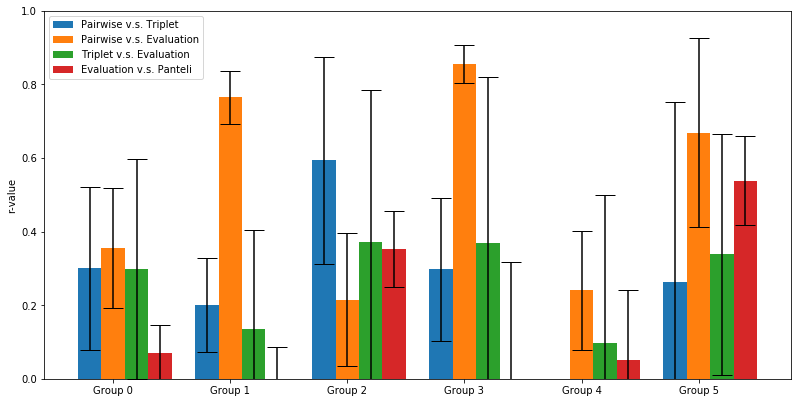

In [24]:
labels = ['Group 0', 'Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects0 = ax.bar(x - width, np.array(r_0), width, yerr=r_e0, capsize=10, label='Pairwise v.s. Triplet')
rects1 = ax.bar(x, np.array(r_1), width, yerr=r_e1, capsize=10, label='Pairwise v.s. Evaluation')
rects2 = ax.bar(x + width, np.array(r_2), width, yerr=r_e2, capsize=10, label='Triplet v.s. Evaluation')
rects3 = ax.bar(x + 2 * width, np.array(r_3), width, yerr=r_e3, capsize=10, label='Evaluation v.s. Panteli')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('r-value')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


ax.set_ylim([0, 1.0])

fig.tight_layout()
fig.set_size_inches(12, 6)
plt.savefig('./misc/r-values by Group and Methods.png')

plt.show()

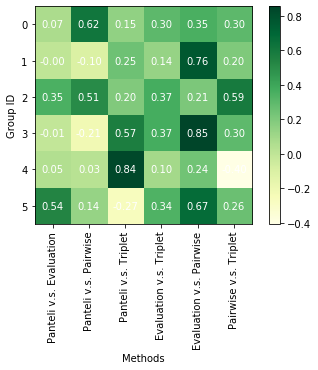

In [25]:
res = []

for i in range(GROUP):
    row = []
    filename = './panteli.csv'
    data = np.nan_to_num(pd.read_csv(filename, header=None).to_numpy(), 0)
    average_panteli_matrix = data[i*5:(i+1)*5, i*5:(i+1)*5] * 100
    a = average_panteli_matrix
    average_panteli_matrix = a[~np.eye(a.shape[0],dtype=bool)].reshape(a.shape[0],-1)
    
    average_group_pairwise_matrix = np.zeros((5, 5))
    count_1 = 0
    for j in range(MAX_PART):
        filename = './results/pairwise_distance_' + str(i) + chr(65 + j) + '.csv'
        if not Path(filename).is_file():
            continue
        count_1 += 1
        data = np.nan_to_num(pd.read_csv(filename, header=None).to_numpy(), 0)
        average_group_pairwise_matrix += data
    average_group_pairwise_matrix /= count_1

    a = average_group_pairwise_matrix
    average_group_pairwise_matrix = a[~np.eye(a.shape[0],dtype=bool)].reshape(a.shape[0],-1)
    
    average_group_triplet_matrix = np.zeros((5, 5))
    count_2 = 0
    for j in range(MAX_PART):
        filename = './results/triple_distance_' + str(i) + chr(65 + j) + '.csv'
        if not Path(filename).is_file():
            continue
        count_2 += 1
        data = np.nan_to_num(pd.read_csv(filename, header=None).to_numpy(), 0)
        average_group_triplet_matrix += data
    average_group_triplet_matrix /= count_2

    a = average_group_triplet_matrix
    average_group_triplet_matrix = a[~np.eye(a.shape[0],dtype=bool)].reshape(a.shape[0],-1)

    average_evaluation_matrix = np.zeros((5, 5))
    count_3 = 0
    for j in range(MAX_PART):
        filename = './results/evaluation_' + str(i) + chr(65 + j) + '.csv'
        if not Path(filename).is_file():
            continue
        count_3 += 1
        raw_data = pd.read_csv(filename, header=None).to_numpy(dtype=np.float32)[:, 1:14]
        raw_data = raw_data[:, [0, 7, 9, 10, 11, 12]]
        data = distance_matrix(raw_data, raw_data)
        data = data / np.max(data) * 100.0
        average_evaluation_matrix += data
    average_evaluation_matrix /= count_3

    a = average_evaluation_matrix
    average_evaluation_matrix = a[~np.eye(a.shape[0],dtype=bool)].reshape(a.shape[0],-1)

    
    slope, intercept, r_value, p_value, std_err = stats.linregress(average_panteli_matrix.flatten(), average_evaluation_matrix.flatten())
    row.append(r_value)
    slope, intercept, r_value, p_value, std_err = stats.linregress(average_panteli_matrix.flatten(), average_group_pairwise_matrix.flatten())
    row.append(r_value)
    slope, intercept, r_value, p_value, std_err = stats.linregress(average_panteli_matrix.flatten(), average_group_triplet_matrix.flatten())
    row.append(r_value)
    slope, intercept, r_value, p_value, std_err = stats.linregress(average_evaluation_matrix.flatten(), average_group_triplet_matrix.flatten())
    row.append(r_value)
    slope, intercept, r_value, p_value, std_err = stats.linregress(average_evaluation_matrix.flatten(), average_group_pairwise_matrix.flatten())
    row.append(r_value)
    slope, intercept, r_value, p_value, std_err = stats.linregress(average_group_pairwise_matrix.flatten(), average_group_triplet_matrix.flatten())
    row.append(r_value)
    res.append(row)
    
res = np.array(res)
im = plt.imshow(res, cmap='YlGn', interpolation='nearest')
plt.colorbar(im)
plt.xlabel("Methods")
plt.xticks([0, 1, 2, 3, 4, 5], ['Panteli v.s. Evaluation','Panteli v.s. Pairwise','Panteli v.s. Triplet','Evaluation v.s. Triplet', 'Evaluation v.s. Pairwise','Pairwise v.s. Triplet'], rotation='vertical')
plt.ylabel("Group ID")
for i in range(res.shape[0]):
    for j in range(res.shape[1]):
        text = plt.text(j, i, '{0:.2f}'.format(res[i, j]),
                       ha="center", va="center", color="w")
plt.savefig("./misc/Triplet Group " + str(i) + " r-value p-value.png")
plt.show()

## Comments

- Triplet Experiments always have a relatively low stardard means comparing to pairwise tests, which means a small set of samples could make sense.
- Feature evaluation can reach the highest agreement if the examinees have good experience in music.
- Even the differences between individuals are the highest when using the pairwise method. The average distance matrix is still stable with enough datasets.

## Songwise Features Agreement

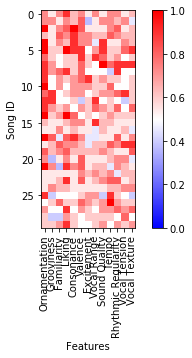

In [26]:
feature_names = ['Ornamentation', 'Grooviness', 'Familiarity', 'Liking', 'Consonance', 'Valence', 'Excitement', 'Vocal Range', 'Sound Quality', 'Tempo', 'Rhythmic Regularity', 'Vocal Tension', 'Vocal Texture']
agreements = np.zeros((GROUP * 5, len(feature_names)))
for n in range(len(feature_names)):
    for i in range(GROUP):
        res = list()
        for j in range(MAX_PART):
            filename = './results/evaluation_' + str(i) + chr(65 + j) + '.csv'
            if not Path(filename).is_file():
                continue
            raw_data = pd.read_csv(filename, header=None).to_numpy(dtype=np.int64)[:, n + 1]
            res.append(raw_data)
        res = np.transpose(np.array(res))
        for j in range(5):
            bincount = np.bincount(res[j])
            agreement = np.max(bincount) / len(res[j])
            agreements[i * 5 + j, n] += agreement

im = plt.imshow(agreements, cmap='bwr', interpolation='nearest', vmin=0.0, vmax=1.0)
plt.xlabel("Features")
plt.ylabel("Song ID")
plt.xticks(list(range(len(feature_names))), feature_names, rotation='vertical')
plt.colorbar(im)

plt.show()

## Pairwise Agreement

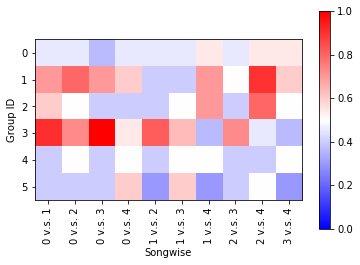

In [4]:
agreements = np.zeros((GROUP, 10))
song_names = list()
for i in range(GROUP):
    res = list()
    for j in range(MAX_PART):
        filename = './results/pairwise_distance_' + str(i) + chr(65 + j) + '.csv'
        if not Path(filename).is_file():
            continue
        data = np.nan_to_num(pd.read_csv(filename, header=None).to_numpy(), 0)
        res.append(data)
    n = 0
    for x in range(5):
        for y in range(x + 1, 5):
            samples = list()
            for sample in res:
                samples.append(int(sample[x][y]))
            bincount = np.bincount(samples)
            agreement = np.max(bincount) / len(samples)
            agreements[i, n] = agreement
            n += 1
            song_names.append(str(x) + ' v.s. ' + str(y))
im = plt.imshow(agreements, cmap='bwr', interpolation='nearest', vmin=0.0, vmax=1.0)
plt.xlabel("Songwise")
plt.xticks(list(range(10)), song_names, rotation='vertical')
plt.ylabel("Group ID")
plt.colorbar(im)
plt.show()

## Triplet Agreement

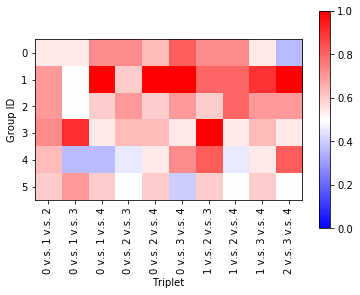

In [5]:
agreements = np.zeros((GROUP, 10))
song_names = list()
for i in range(GROUP):
    res = list()
    for j in range(MAX_PART):
        filename = './results/triple_' + str(i) + chr(65 + j) + '.csv'
        if not Path(filename).is_file():
            continue
        data = np.nan_to_num(pd.read_csv(filename, header=None).to_numpy(), 0)[:, -1]
        res.append(data)
    res = np.transpose(np.array(res))
    for j in range(10):
        bincount = np.bincount(res[j])
        agreement = np.max(bincount) / len(res[j])
        agreements[i, j] = agreement
        
for i in range(5):
    for j in range(i+1, 5):
        for k in range(j+1, 5):
            song_names.append(str(i) + ' v.s. ' + str(j) + ' v.s. ' + str(k))
im = plt.imshow(agreements, cmap='bwr', interpolation='nearest', vmin=0.0, vmax=1.0)
plt.xlabel("Triplet")
plt.xticks(list(range(10)), song_names, rotation='vertical')
plt.ylabel("Group ID")
plt.colorbar(im)
plt.show()

## Songwise Features Cohen's Kappa

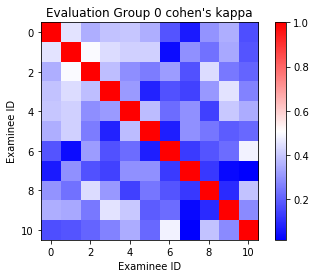

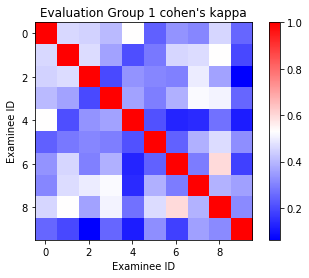

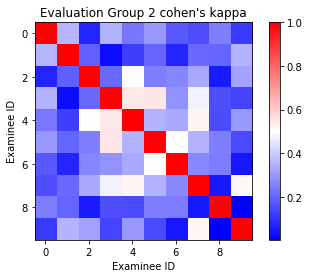

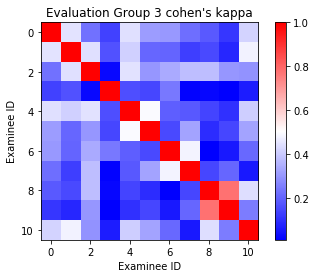

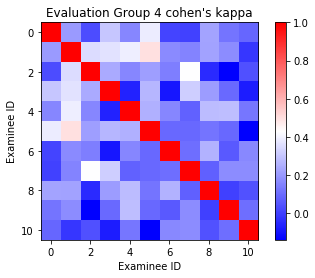

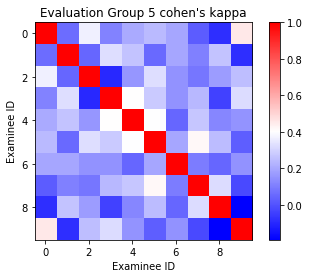

In [35]:
for i in range(GROUP):
    res = list()
    for j in range(MAX_PART):
        filename = './results/evaluation_' + str(i) + chr(65 + j) + '.csv'
        if not Path(filename).is_file():
            continue
        raw_data = pd.read_csv(filename, header=None).to_numpy(dtype=np.float32)[:, 1:14]
        raw_data = raw_data[:, [0, 7, 9, 10, 11, 12]]
        res.append(raw_data)
    r_matrix = np.zeros((len(res), len(res)))
    for x in range(len(res)):
        for y in range(len(res)):
            cohen = cohen_kappa_score(res[x].flatten(), res[y].flatten(), [0, 50, 100])
            r_matrix[x, y] = cohen
            r_matrix[y, x] = cohen
    im = plt.imshow(r_matrix, cmap='bwr', interpolation='nearest')
    plt.title("Evaluation Group " + str(i) + " cohen's kappa")
    plt.colorbar(im)
    plt.xlabel("Examinee ID")
    plt.ylabel("Examinee ID")
    plt.savefig("./misc/Evaluation Group " + str(i) + " cohen kappa.png")
    plt.show()

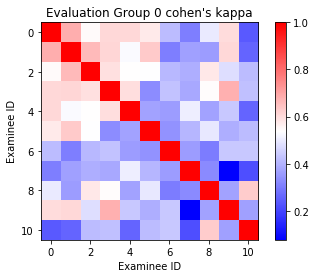

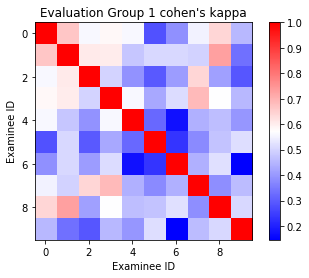

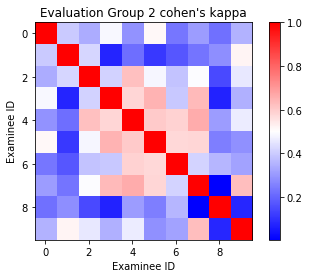

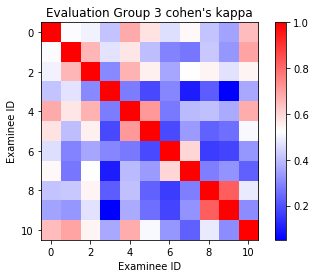

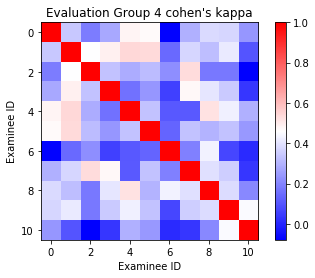

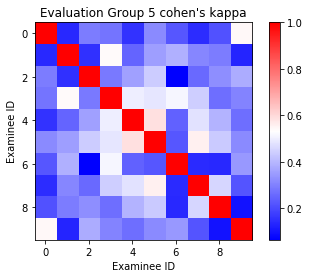

In [3]:
for i in range(GROUP):
    res = list()
    for j in range(MAX_PART):
        filename = './results/evaluation_' + str(i) + chr(65 + j) + '.csv'
        if not Path(filename).is_file():
            continue
        raw_data = pd.read_csv(filename, header=None).to_numpy(dtype=np.float32)[:, 1:14]
        raw_data = raw_data[:, [0, 7, 9, 10, 11, 12]]
        res.append(raw_data)
    r_matrix = np.zeros((len(res), len(res)))
    for x in range(len(res)):
        for y in range(len(res)):
            cohen = cohen_kappa_score(res[x].flatten(), res[y].flatten(), [0, 50, 100], weights='quadratic')
            r_matrix[x, y] = cohen
            r_matrix[y, x] = cohen
    im = plt.imshow(r_matrix, cmap='bwr', interpolation='nearest')
    plt.title("Evaluation Group " + str(i) + " cohen's kappa")
    plt.colorbar(im)
    plt.xlabel("Examinee ID")
    plt.ylabel("Examinee ID")
    plt.savefig("./misc/Evaluation Group " + str(i) + " weighted cohen kappa.png")
    plt.show()

## Pairwise Cohen's Kappa

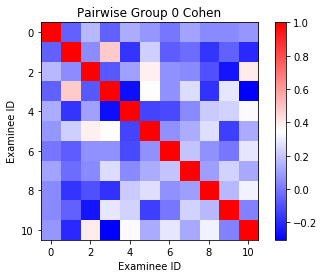

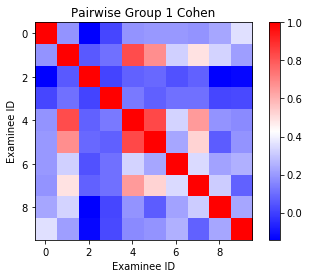

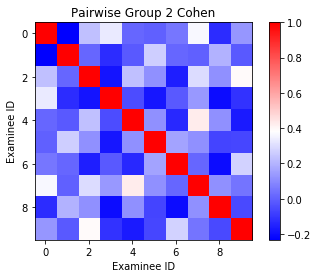

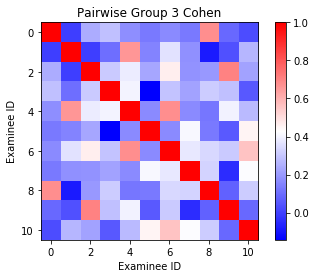

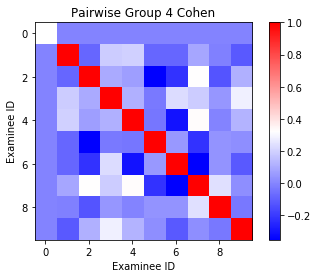

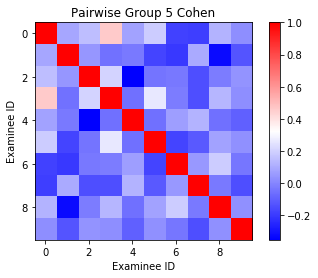

In [42]:
for i in range(GROUP):
    res = list()
    for j in range(MAX_PART):
        filename = './results/pairwise_distance_' + str(i) + chr(65 + j) + '.csv'
        if not Path(filename).is_file():
            continue
        data = np.nan_to_num(pd.read_csv(filename, header=None).to_numpy(), 0)
        a = data
        res.append(a[~np.eye(a.shape[0],dtype=bool)].reshape(a.shape[0],-1))
    r_matrix = np.zeros((len(res), len(res)))
    for x in range(len(res)):
        for y in range(len(res)):
            cohen = cohen_kappa_score(res[x].flatten(), res[y].flatten())
            r_matrix[x, y] = cohen
            # r_matrix[y, x] = cohen
    im = plt.imshow(r_matrix, cmap='bwr', interpolation='nearest')
    plt.title("Pairwise Group " + str(i) + " Cohen")
    plt.colorbar(im)
    plt.xlabel("Examinee ID")
    plt.ylabel("Examinee ID")
    plt.savefig("./misc/Pairwise Group " + str(i) + " cohen.png")
    plt.show()

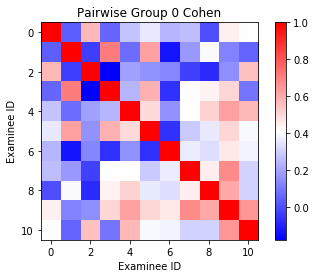

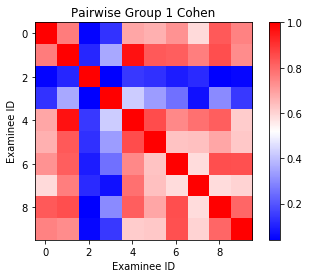

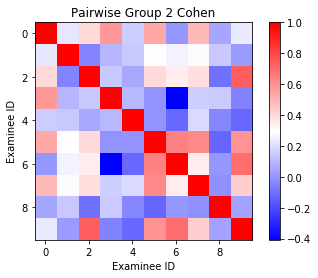

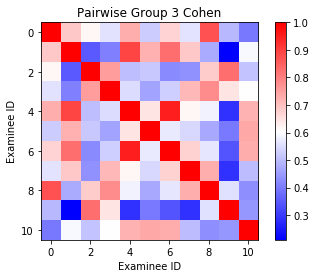

/Users/delton/WorkSpace/Keio/yamaha-results/venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:600: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


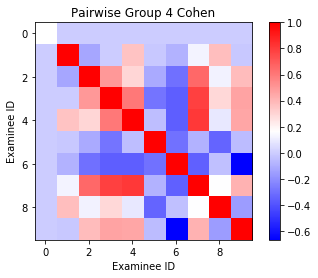

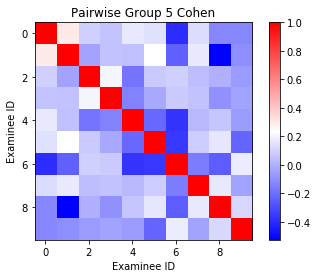

In [4]:
for i in range(GROUP):
    res = list()
    for j in range(MAX_PART):
        filename = './results/pairwise_distance_' + str(i) + chr(65 + j) + '.csv'
        if not Path(filename).is_file():
            continue
        data = np.nan_to_num(pd.read_csv(filename, header=None).to_numpy(), 0)
        a = data
        res.append(a[~np.eye(a.shape[0],dtype=bool)].reshape(a.shape[0],-1))
    r_matrix = np.zeros((len(res), len(res)))
    for x in range(len(res)):
        for y in range(len(res)):
            cohen = cohen_kappa_score(res[x].flatten(), res[y].flatten(), weights='quadratic')
            r_matrix[x, y] = cohen
            # r_matrix[y, x] = cohen
    im = plt.imshow(r_matrix, cmap='bwr', interpolation='nearest')
    plt.title("Pairwise Group " + str(i) + " Cohen")
    plt.colorbar(im)
    plt.xlabel("Examinee ID")
    plt.ylabel("Examinee ID")
    plt.savefig("./misc/Pairwise Group " + str(i) + " weighted cohen.png")
    plt.show()

## Triplet Cohen's Kappa

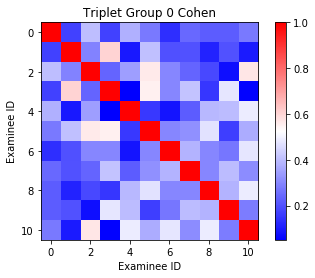

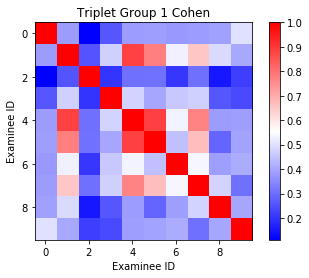

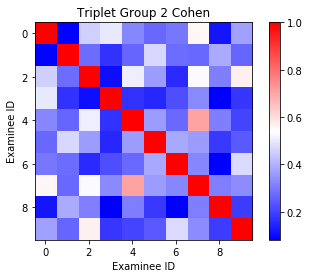

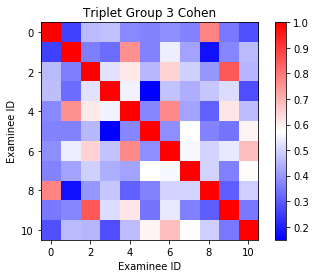

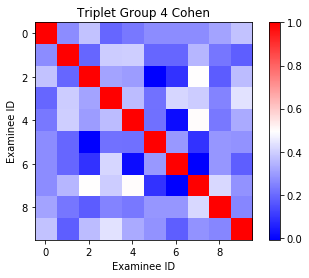

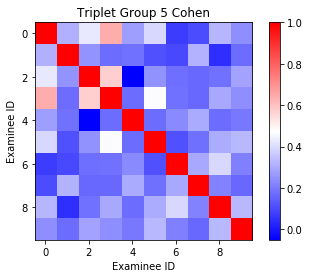

In [43]:
agreements = np.zeros((GROUP, 10))
song_names = list()
for i in range(GROUP):
    res = list()
    for j in range(MAX_PART):
        filename = './results/pairwise_distance_' + str(i) + chr(65 + j) + '.csv'
        if not Path(filename).is_file():
            continue
        data = np.nan_to_num(pd.read_csv(filename, header=None).to_numpy(), 0)
        res.append(data)
    r_matrix = np.zeros((len(res), len(res)))
    for x in range(len(res)):
        for y in range(len(res)):
            cohen = cohen_kappa_score(res[x].flatten(), res[y].flatten())
            r_matrix[x, y] = cohen
    im = plt.imshow(r_matrix, cmap='bwr', interpolation='nearest')
    plt.title("Triplet Group " + str(i) + " Cohen")
    plt.colorbar(im)
    plt.xlabel("Examinee ID")
    plt.ylabel("Examinee ID")
    plt.savefig("./misc/Triplet Group " + str(i) + " cohen.png")
    plt.show()

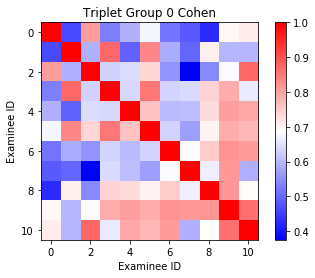

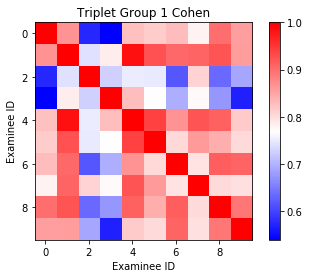

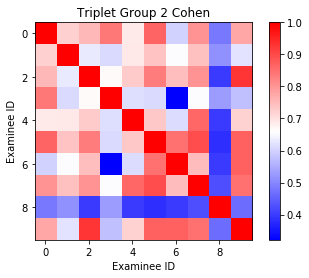

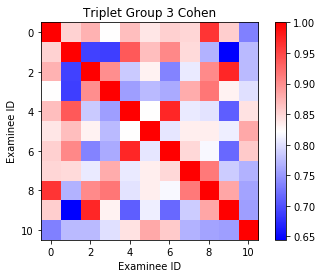

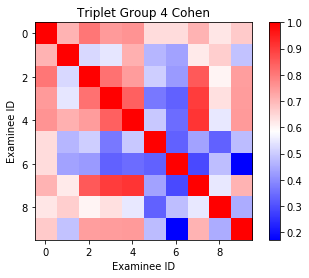

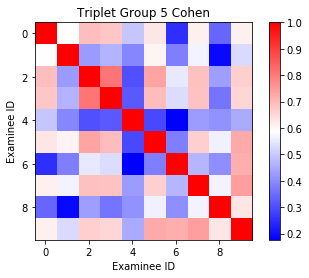

In [5]:
agreements = np.zeros((GROUP, 10))
song_names = list()
for i in range(GROUP):
    res = list()
    for j in range(MAX_PART):
        filename = './results/pairwise_distance_' + str(i) + chr(65 + j) + '.csv'
        if not Path(filename).is_file():
            continue
        data = np.nan_to_num(pd.read_csv(filename, header=None).to_numpy(), 0)
        res.append(data)
    r_matrix = np.zeros((len(res), len(res)))
    for x in range(len(res)):
        for y in range(len(res)):
            cohen = cohen_kappa_score(res[x].flatten(), res[y].flatten(), weights='quadratic')
            r_matrix[x, y] = cohen
    im = plt.imshow(r_matrix, cmap='bwr', interpolation='nearest')
    plt.title("Triplet Group " + str(i) + " Cohen")
    plt.colorbar(im)
    plt.xlabel("Examinee ID")
    plt.ylabel("Examinee ID")
    plt.savefig("./misc/Triplet Group " + str(i) + " weighted cohen.png")
    plt.show()